## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [3]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"

# Načítanie datasetu
data_hf = pd.read_csv(dataset_url)
print("Dataset bol načítaný.")


Dataset bol načítaný.


   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

In [5]:
# Kontrola chýbajúcich hodnôt
print("Chýbajúce hodnoty v datasete:")
print(data_hf.isna().sum())

Chýbajúce hodnoty v datasete:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

In [7]:
# Kontrola typov premenných
selected_columns = ['age', 'anaemia', 'high_blood_pressure', 'serum_sodium', 'DEATH_EVENT']
print("\nTypy vybraných premenných:")
print(data_hf[selected_columns].dtypes)


Typy vybraných premenných:
age                    float64
anaemia                  int64
high_blood_pressure      int64
serum_sodium             int64
DEATH_EVENT              int64
dtype: object


**Obsahuje dataset duplicitné záznamy?**

In [8]:
# Kontrola duplicitných záznamov
duplicates = data_hf.duplicated().sum()
print(f"\nPočet duplicitných záznamov: {duplicates}")


Počet duplicitných záznamov: 0


### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)


Počet záznamov podľa pohlavia (0 = žena, 1 = muž):
sex
0    105
1    194
Name: count, dtype: int64


**Koľko záznamov mužov a žien obsahuje dataset?**

In [10]:
sex_counts = data_hf['sex'].value_counts().sort_index()  # sort_index zabezpečí poradie 0, 1
print("\nPočet záznamov podľa pohlavia (0 = žena, 1 = muž):")
print(sex_counts)


Počet záznamov podľa pohlavia (0 = žena, 1 = muž):
sex
0    105
1    194
Name: count, dtype: int64


**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

In [11]:
if 'smoking' in data_hf.columns:
    non_smokers_by_sex = data_hf[data_hf['smoking'] == 0]['sex'].value_counts().sort_index()
    print("\nPočet nefajčiarov podľa pohlavia (0 = žena, 1 = muž):")
    print(non_smokers_by_sex)
else:
    print("\nStĺpec 'smoking' nie je v datasete.")


Počet nefajčiarov podľa pohlavia (0 = žena, 1 = muž):
sex
0    101
1    102
Name: count, dtype: int64


### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [ ]:
# TODO

**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

In [12]:
min_age = data_hf['age'].min()
max_age = data_hf['age'].max()
mean_age = data_hf['age'].mean()
print("\nŠtatistika pre 'age':")
print("Minimálny vek:", min_age)
print("Maximálny vek:", max_age)
print("Priemerný vek:", mean_age)


Štatistika pre 'age':
Minimálny vek: 40.0
Maximálny vek: 95.0
Priemerný vek: 60.83389297658862


**Z akého veku je v datasete najviac záznamov?**

In [13]:
mode_age = data_hf['age'].mode()[0]
print("Vek s najväčším počtom záznamov (moda):", mode_age)

Vek s najväčším počtom záznamov (moda): 60.0


### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.


Premenná 'risk' bola pridaná do datasetu.


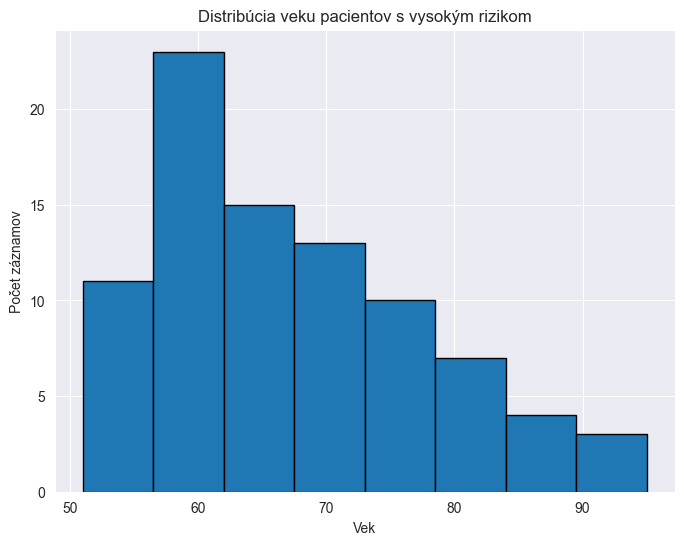

In [15]:
import matplotlib.pyplot as plt
data_hf['risk'] = data_hf.apply(lambda row: 'High' if (row['age'] > 50 and row['serum_creatinine'] > 1.2) else 'Low', axis=1)
print("\nPremenná 'risk' bola pridaná do datasetu.")

# Vizualizácia: Histogram distribúcie veku pre pacientov s vysokým rizikom ('High')
high_risk = data_hf[data_hf['risk'] == 'High']
plt.figure(figsize=(8, 6))
plt.hist(high_risk['age'], bins='auto', edgecolor='black')
plt.title('Distribúcia veku pacientov s vysokým rizikom')
plt.xlabel('Vek')
plt.ylabel('Počet záznamov')
plt.show()

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

In [ ]:
# TODO

**V akom veku je riziko zlyhania srdca najväčšie?**

In [18]:
if not high_risk.empty:
    high_risk_mode_age = high_risk['age'].mode()[0]
    print("\nNajvyššie riziko úmrtia je zaznamenané v kategórii veku:", high_risk_mode_age)
else:
    print("V datasete nie sú žiadne záznamy s vysokým rizikom.")


Najvyššie riziko úmrtia je zaznamenané v kategórii veku: 60.0


**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

In [19]:
count_high_risk_mode = (high_risk['age'] == high_risk_mode_age).sum()
print("Počet záznamov v tejto vekovej kategórii:", count_high_risk_mode)

Počet záznamov v tejto vekovej kategórii: 18


### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.



Korelačná matica:
                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT        

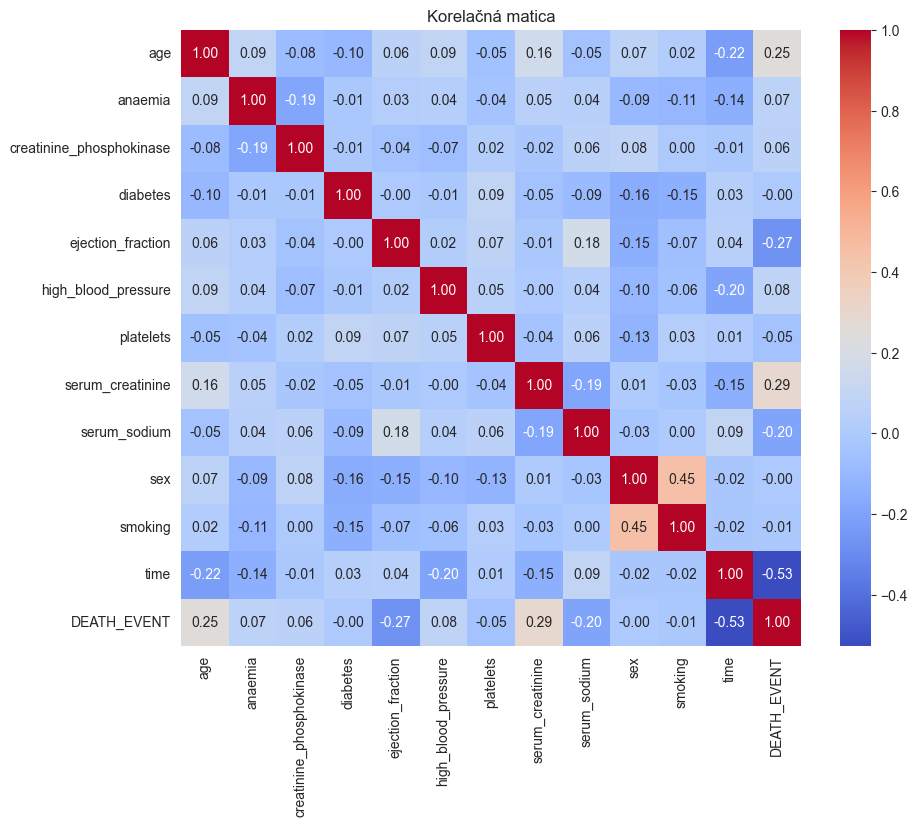

In [23]:
numerical_cols = data_hf.select_dtypes(include=[np.number])
corr_matrix = numerical_cols.corr()
print("\nKorelačná matica:")
print(corr_matrix)

# Vizualizácia korelačnej matice pomocou heatmapy
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Korelačná matica")
plt.show()

**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

In [25]:
corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_pairs = corr_pairs.unstack().dropna()
sorted_corr = corr_pairs.sort_values()
print("\nDvojice atribútov s najväčšou zápornou koreláciou:")
print(sorted_corr.head(2))


Dvojice atribútov s najväčšou zápornou koreláciou:
DEATH_EVENT  time                -0.526964
             ejection_fraction   -0.268603
dtype: float64

Dve dvojice atribútov s najväčšou zápornou koreláciou:
DEATH_EVENT  time          -0.526964
time         DEATH_EVENT   -0.526964
dtype: float64


**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

In [26]:
sorted_corr_positive = corr_pairs[corr_pairs < 1].sort_values(ascending=False)
print("\nDvojica atribútov s najväčšou kladnou koreláciou:")
print(sorted_corr_positive.head(1))


Dvojica atribútov s najväčšou kladnou koreláciou:
smoking  sex    0.445892
dtype: float64


----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure